http://simbad.u-strasbg.fr/simbad/sim-id?Ident=IRAS+16562-3959

Guzman, Sanhueza: https://ui.adsabs.harvard.edu/search/q=bibcode%3A(2020ApJ...904...77G)&sort=date%20desc%2C%20bibcode%20desc&p_=0


In [31]:
from astropy import units as u
distance = 2.3*u.kpc

In [32]:
cd /orange/adamginsburg/salt/sanhueza/I16562

/orange/adamginsburg/salt/sanhueza/I16562


In [2]:
ls

bigbox.reg
box.reg
ipython_log_2021-10-06.py
IRAS_165623959.config8.cont_avg.selfcal_0.5_hogbom.image.fits*
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller.fits
IRAS_165623959.config8.spw0.robust0.5.image_small.fits*
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller.fits
IRAS_165623959.config8.spw1.robust0.5.image_small.fits*
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller.fits
IRAS_165623959.config8.spw2.robust0.5.image_small.fits*
IRAS_165623959.config8.spw3.robust0.5.image_cb_smaller.fits
IRAS_165623959.config8.spw3.robust0.5.image_small.fits*
NaCl_v_le_3_stackcube.fits
spectra/


In [111]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'

from spectral_cube import SpectralCube
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2aedb298a0a0>

In [4]:
from astropy.table import Table
from astropy import table

In [5]:
import pprint

In [6]:
import scipy, scipy.ndimage

In [7]:
import numpy as np
import os
import glob
from astropy import constants, units as u, table, stats, coordinates, wcs, log, coordinates as coord
import radio_beam
import pyspeckit
import pylab as pl
from astroquery.splatalogue.utils import minimize_table as mt
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis')
import lines
import paths
from salt_tables import (salt_tables, salt_table_names, SO, SO2, HCl, sis_tables, AlCl, AlF, Al37Cl,
                         NaF, AlO, AlOH, NaCN, CaS, CaO)

In [39]:
ls *.reg

bigbox.reg  box.reg


In [40]:
import regions
from astropy import units as u, coordinates
reg = regions.Regions.read('bigbox.reg')
regsm = regions.Regions.read('box.reg')
regvsm = regions.Regions.read('rrldiskbox.reg')
#regvvsm = regions.Regions.read('innerdiskbox.reg')

In [41]:
from astropy import visualization

(2775.0, 2966.0, 2805.0, 2996.0)

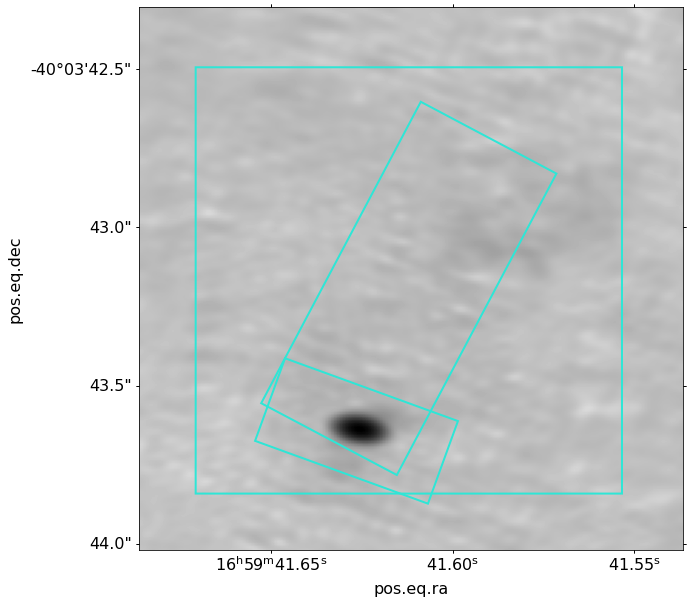

In [42]:
cont = SpectralCube.read('IRAS_165623959.config8.cont_avg.selfcal_0.5_hogbom.image.fits')
pl.figure(figsize=(10,10))
ax = pl.subplot(projection=cont[0].wcs)
ax.imshow(cont[0].value, cmap='gray_r', norm=visualization.simple_norm(cont[0].value, stretch='log'))
reg[0].to_pixel(cont[0].wcs).plot(ax=ax)
regsm[0].to_pixel(cont[0].wcs).plot(ax=ax)
regvsm[0].to_pixel(cont[0].wcs).plot(ax=ax)
#regvvsm[0].to_pixel(cont[0].wcs).plot(ax=ax)
pp = reg[0].to_pixel(cont.wcs.celestial)
bb = pp.bounding_box
ax.axis([bb.ixmin-20, bb.ixmax+20, bb.iymin-20, bb.iymax+20])

# NaCl Stackl

In [43]:
from spectral_cube.analysis_utilities import stack_cube

In [44]:
nacltables = salt_tables[3:5]
#nacltables[0]

Iso,Ju,Jl,vu,vl,nuCalc,e_nuCalc,x_nuCalc,E_U,Aij,Freq,gu,gl,E_L,QNs,Species
,,,,,,,,K,1 / s,GHz,,,,,
str2,int16,int16,uint8,uint8,float64,float64,str9,float64,float32,float64,int16,int16,float64,str15,str24
35,1,0,8,8,12268.92600,0.002000,MHz,4019.50,7e-07,12.26893,48,16,4018.9111844187687,v=8-8 J=1-0,23Na-35Clv=8-8 J=1-0
35,1,0,7,7,12361.41100,0.001000,MHz,3534.10,7e-07,12.36141,48,16,3533.506745838812,v=7-7 J=1-0,23Na-35Clv=7-7 J=1-0
35,1,0,6,6,12454.51100,0.001000,MHz,3043.90,7e-07,12.45451,48,16,3043.302277743511,v=6-6 J=1-0,23Na-35Clv=6-6 J=1-0
35,1,0,5,5,12548.22800,0.000000,MHz,2548.90,7e-07,12.54823,48,16,2548.29778003688,v=5-5 J=1-0,23Na-35Clv=5-5 J=1-0
35,1,0,4,4,12642.56100,0.000000,MHz,2049.20,7e-07,12.64256,48,16,2048.593252766911,v=4-4 J=1-0,23Na-35Clv=4-4 J=1-0
35,1,0,3,3,12737.51100,0.000000,MHz,1544.50,7e-07,12.73751,48,16,1543.8886958856133,v=3-3 J=1-0,23Na-35Clv=3-3 J=1-0
35,1,0,2,2,12833.07700,0.000000,MHz,1034.90,7e-07,12.83308,48,16,1034.2841094409778,v=2-2 J=1-0,23Na-35Clv=2-2 J=1-0
35,1,0,1,1,12929.26100,0.000000,MHz,520.30,7e-07,12.92926,48,16,519.6794933370201,v=1-1 J=1-0,23Na-35Clv=1-1 J=1-0


In [45]:
import spectral_cube.analysis_utilities
import imp
imp.reload(spectral_cube.analysis_utilities)
from spectral_cube.analysis_utilities import stack_cube

In [46]:
flist = (glob.glob('IRAS_165623959.config8.spw[0-3].robust0.5.image_small.fits'))

In [80]:
for fn in flist:
    outfile = fn.replace("_small","_cb_smaller")
    if not os.path.exists(outfile) or SpectralCube.read(outfile).unit != u.K:
        cube = SpectralCube.read(fn).subcube_from_regions(reg)
        cube.allow_huge_operations=True
        cb = cube.beams.common_beam(max_iter=20, max_epsilon=0.01)
        scube = cube.convolve_to(cb)
        scube.to(u.K).write(outfile, overwrite=True)

In [130]:
cubes = [SpectralCube.read(fn, use_dask=True).subcube_from_regions(reg) for fn in (glob.glob('IRAS_165623959.config8.spw[0-3].robust0.5.image_cb_smaller.fits'))]
cubes

[DaskSpectralCube with shape=(3840, 150, 150) and unit=K and chunk size (640, 150, 150):
  n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
  n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.062178 deg:  -40.061806 deg
  n_s:   3840  type_s: FREQ      unit_s: Hz     range: 233564760791.000 Hz:235439366812.920 Hz,
 DaskSpectralCube with shape=(3840, 150, 150) and unit=K and chunk size (640, 150, 150):
  n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
  n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.062178 deg:  -40.061806 deg
  n_s:   3840  type_s: FREQ      unit_s: Hz     range: 219064633178.480 Hz:220939239200.400 Hz,
 DaskSpectralCube with shape=(3840, 150, 150) and unit=K and chunk size (640, 150, 150):
  n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
  n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.062178 deg:  -40.061806 deg
  n_s: 

In [82]:
# only needed for VRSCs
if hasattr(cubes[0], 'beams'):
    beams = radio_beam.Beams(beams=[cube.beams.common_beam(max_iter=20, max_epsilon=0.01) for cube in cubes])
    cb=beams.common_beam()
else:
    beams = radio_beam.Beams(beams=[cube.beam for cube in cubes])
    cb=beams.common_beam()

In [83]:
cb

Beam: BMAJ=0.10612074327676284 arcsec BMIN=0.05378061945456527 arcsec BPA=81.71778022124695 deg

In [84]:
(cb.major*distance).to(u.au, u.dimensionless_angles())

<Quantity 244.07770954 AU>

In [85]:
(cb.minor*distance).to(u.au, u.dimensionless_angles())

<Quantity 123.69542475 AU>

In [86]:
linelist = np.concatenate([data['Freq'][(data['vu'] <= 3) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubes],
                                                 axis=0)].quantity
                             for data in nacltables])
linenames = np.concatenate( [data['Species'][(data['vu'] <= 3) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubes],
                                                 axis=0)]
                             for data in nacltables] )
(linelist, linenames)

(<Quantity [217.980231, 219.614936, 232.509977, 234.251912] GHz>,
 array(['23Na-35Clv=2-2 J=17-16', '23Na-35Clv=1-1 J=17-16',
        '23Na-35Clv=1-1 J=18-17', '23Na-35Clv=0-0 J=18-17'], dtype='<U24'))

In [87]:
from astropy import log
log.setLevel('INFO')

In [88]:
# log.setLevel('DEBUG')
vcen = -14 * u.km/u.s # from Patricio
stack, cutouts = stack_cube(cubes,
                   linelist=linelist,
                   vmin=vcen-30*u.km/u.s,
                   vmax=vcen+30*u.km/u.s,
                   average=np.nanmean,
                   convolve_beam=cb,
                   return_cutouts=True)
#log.setLevel('INFO')
stack.write('NaCl_v_le_3_stackcube.fits', overwrite=True)

In [89]:
stackc = SpectralCube.read('NaCl_v_le_3_stackcube.fits')
stackc

SpectralCube with shape=(90, 150, 150) and unit=K:
 n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
 n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.062178 deg:  -40.061806 deg
 n_s:     90  type_s: VRAD      unit_s: km / s  range:      -43.875 km / s:      15.896 km / s

In [92]:
jtok = stackc.beam.jtok(217*u.GHz)

All-NaN slice encountered
invalid value encountered in true_divide


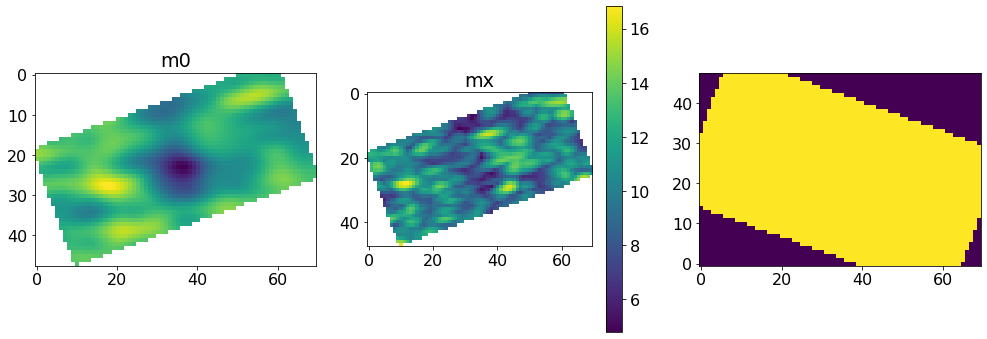

<Figure size 432x288 with 0 Axes>

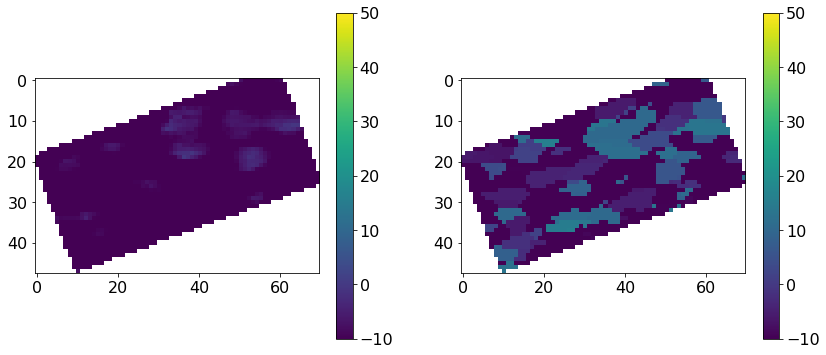

In [95]:
stackc = stackc.subcube_from_regions(regvsm)
pl.figure(figsize=(14,5))
pl.subplot(1,3,1)
m0 = stackc.moment0()
m0.quicklook()
pl.title("m0")

pl.subplot(1,3,2)
mx = stackc.max(axis=0)
mx.quicklook()
pl.title("mx")
pl.colorbar()
pl.subplot(1,3,3)
msk = mx > 0.00016*mx.unit*jtok.value
msk = scipy.ndimage.binary_erosion(msk, iterations=1)
msk = scipy.ndimage.binary_dilation(msk, iterations=5)
pl.imshow(msk, interpolation='none', origin='lower')
pl.tight_layout()
pl.figure()


m1 = stackc.with_mask(msk).with_mask(stackc > 0.0005*stackc.unit*jtok.value).moment1()
pl.figure(figsize=(14,6))
ax1 = pl.subplot(1,2,1)
im = ax1.imshow(m1.value, vmin=-10, vmax=50)
pl.colorbar(mappable=im)
mxv = stackc.with_mask(msk).argmax_world(axis=0)
pl.subplot(1,2,2)
pl.imshow(mxv.value, vmin=-10, vmax=50)
pl.colorbar()


vmapnacl = mxv.hdu

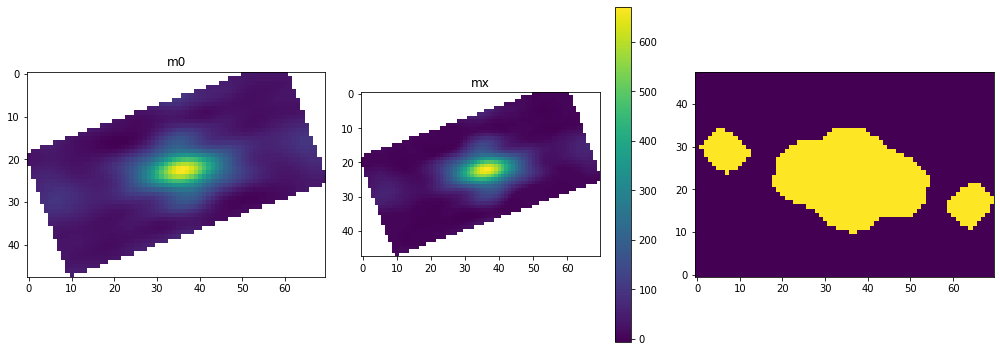

<Figure size 432x288 with 0 Axes>

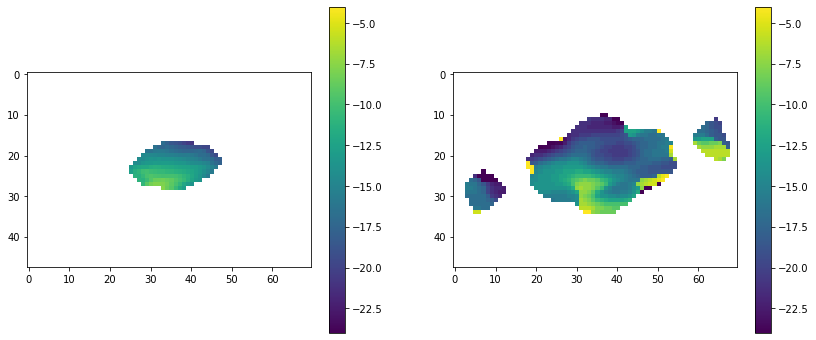

In [131]:
# try creating a vmap based on another line
restval = 218.32471100 *u.GHz # HC3N
restval = 231.90092800 * u.GHz # H30a
cube = [c for c in cubes if (c.spectral_extrema[0] < restval) & (c.spectral_extrema[1] > restval)][0]
from astropy.convolution import Gaussian1DKernel
scube = cube.subcube_from_regions(regvsm).with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=restval).spectral_slab(-50*u.km/u.s + vcen, 50*u.km/u.s + vcen).spectral_smooth(Gaussian1DKernel(5))
pl.figure(figsize=(14,5))
pl.subplot(1,3,1)
m0 = scube.moment0()
m0.quicklook()
pl.title("m0")

pl.subplot(1,3,2)
mx = scube.max(axis=0)
mx.quicklook()
pl.title("mx")
pl.colorbar()
pl.subplot(1,3,3)
msk = mx > 0.01*mx.unit*jtok.value
msk = scipy.ndimage.binary_erosion(msk, iterations=1)
msk = scipy.ndimage.binary_dilation(msk, iterations=3)
pl.imshow(msk, interpolation='none', origin='lower')
pl.tight_layout()
pl.figure()


from dask_image.ndmorph import binary_dilation, binary_erosion
m3d = (scube > 200*u.K).include()
m3d = binary_erosion(m3d, iterations=1)
m3d = binary_dilation(m3d, iterations=2)
m3d = m3d.compute()




m1 = scube.with_mask(msk).with_mask(m3d).moment1()
pl.figure(figsize=(14,6))
ax1 = pl.subplot(1,2,1)
im = ax1.imshow(m1.value, vmin=-10+vcen.value, vmax=10+vcen.value)
pl.colorbar(mappable=im)
mxv = scube.with_mask(msk).argmax_world(axis=0)
pl.subplot(1,2,2)
pl.imshow(mxv.value, vmin=-10+vcen.value, vmax=10+vcen.value)
pl.colorbar()


#vmap = mxv.hdu
vmap = m1.hdu
# the rest value selected above was just the line center; we need to assume it's really 32 km/s off
#vmap.data = vmap.data + vcen.value

In [98]:
import sys
sys.path.append('/orange/adamginsburg/salt/code/')
from overplot_saltlines import overplot_saltlines

In [99]:
spectra = []
for ii,cube in enumerate(cubes):
    cube.allow_huge_operations=True
    sp = cube.subcube_from_regions(regsm).mean(axis=(1,2))
    pysp = pyspeckit.Spectrum(data=sp, xarr=sp.spectral_axis, header=sp.header)
    spectra.append(pysp)
    pysp.specname = f'spw{ii+1}'

In [100]:
mkdir -p spectra/figures

spw1
spw2
spw3
spw4


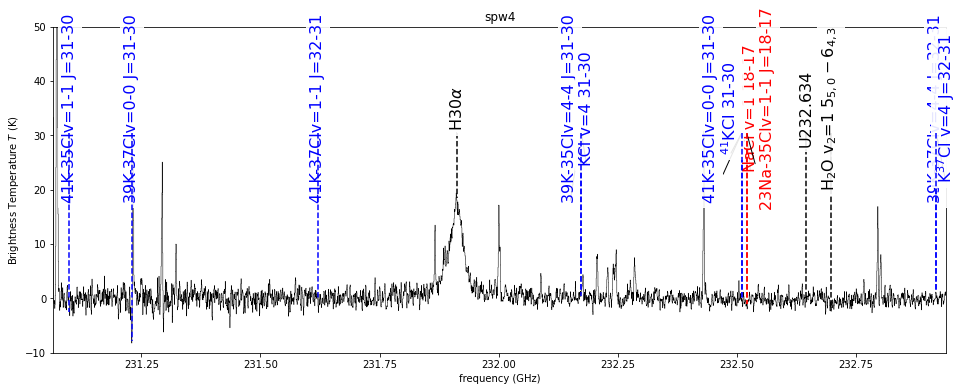

In [124]:
overplot_saltlines(spectra, vcen=vcen, savepath='spectra/figures', ymin=-10, ymax=50)

In [113]:
ls spectra/figures

color_labels_IRAS_165623959_spw0_stack.png
color_labels_IRAS_165623959_spw1_stack.png
color_labels_IRAS_165623959_spw2_stack.png
color_labels_IRAS_165623959_spw3_stack.png
color_labels_spw1.png
color_labels_spw2.png
color_labels_spw3.png
color_labels_spw4.png
gallery.html
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_stack.png
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_stack.png
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller_stack.png
IRAS_165623959.config8.spw3.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw3.robust0.5.image_cb_smaller_stack.png
IRAS_165623959_spw0_stack.png
IRAS_165623959_spw1_stack.png
IRAS_165623959_spw2_stack.png
IRAS_165623959_spw3_stack.png
spw1.png
spw2.png
spw3.png
spw4.png
style.css


In [114]:
from IPython.display import Image,display

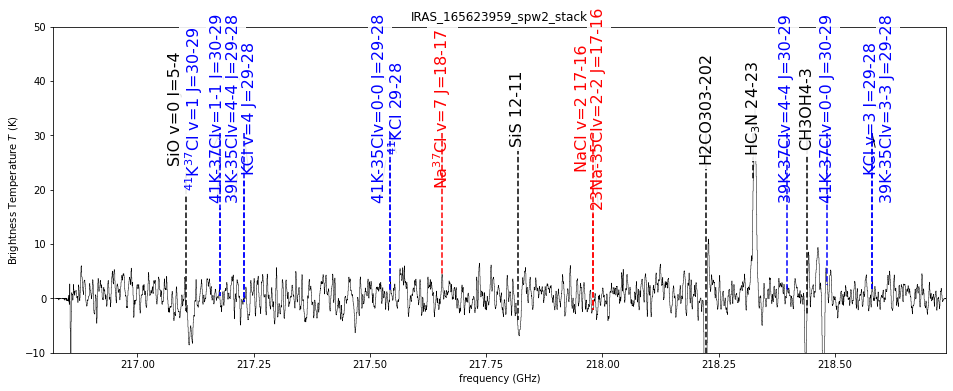

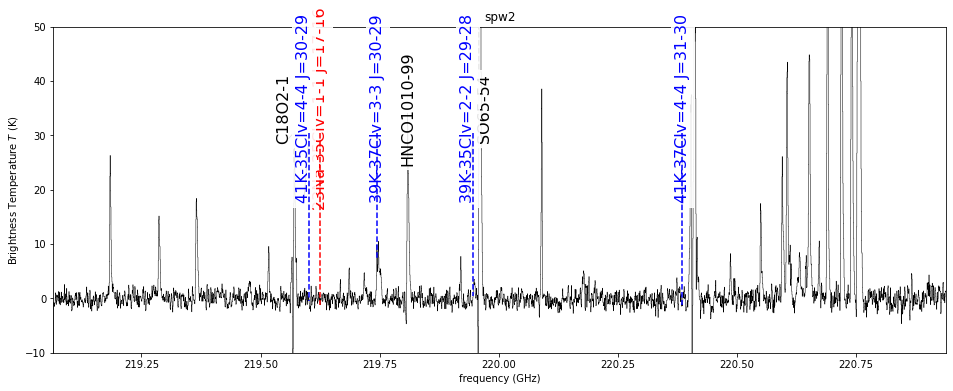

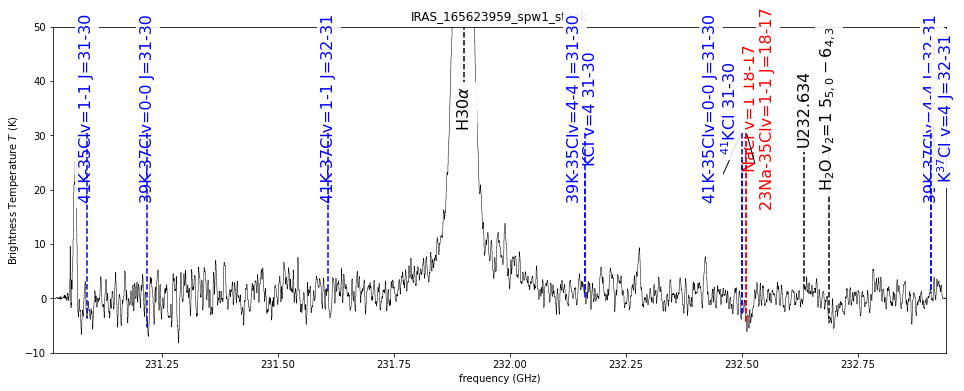

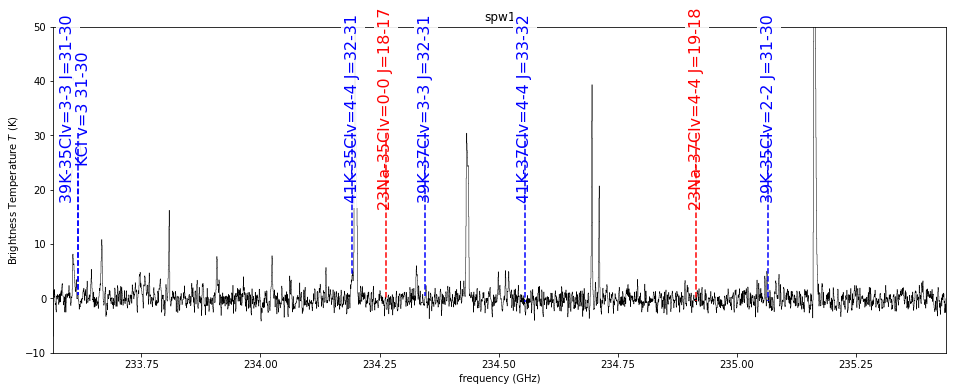

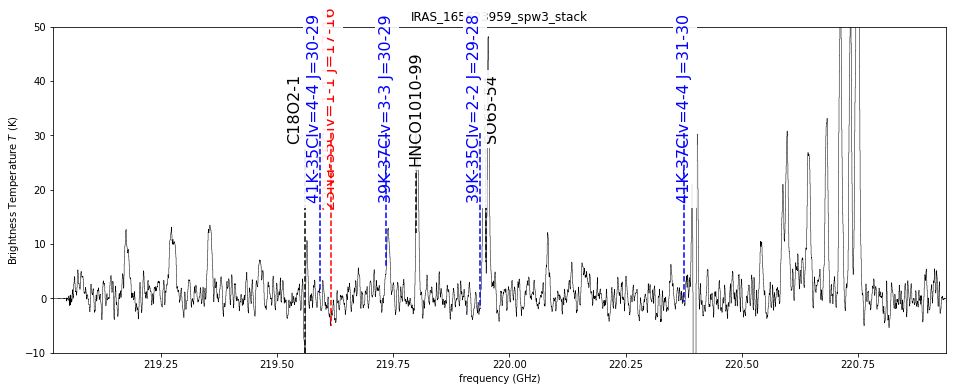

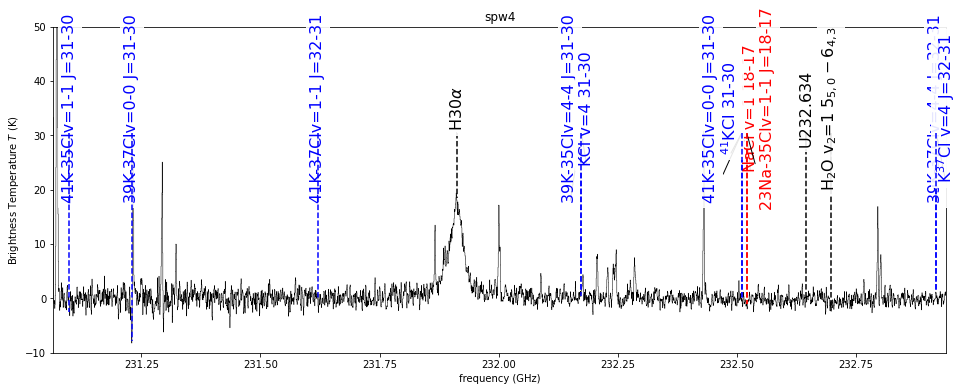

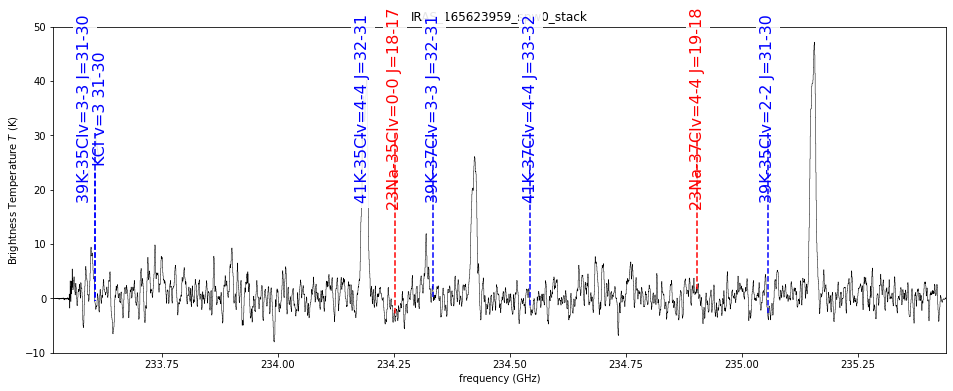

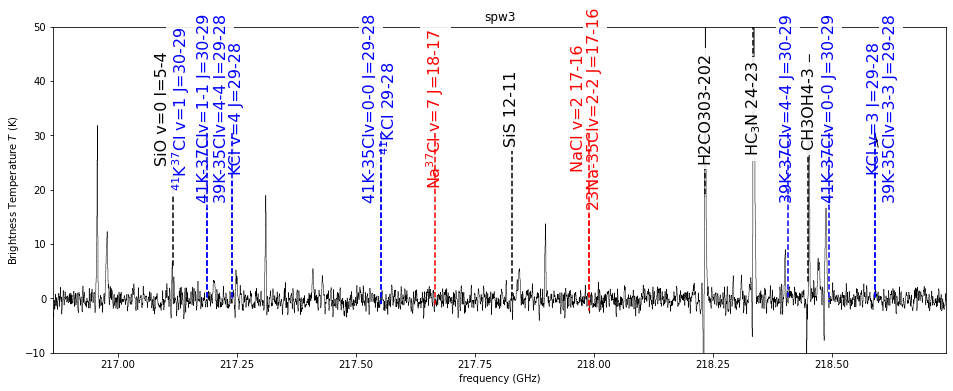

In [125]:
for fn in glob.glob('spectra/figures/color*png'):
    display(Image(fn))

DaskSpectralCube with shape=(3840, 150, 150) and unit=K and chunk size (640, 150, 150):
 n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
 n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.062178 deg:  -40.061806 deg
 n_s:   3840  type_s: FREQ      unit_s: Hz     range: 233564760791.000 Hz:235439366812.920 Hz
Mean spectrum
Stacking
DaskSpectralCube with shape=(3840, 150, 150) and unit=K and chunk size (640, 150, 150):
 n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
 n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.062178 deg:  -40.061806 deg
 n_s:   3840  type_s: FREQ      unit_s: Hz     range: 219064633178.480 Hz:220939239200.400 Hz
Mean spectrum
Stacking
DaskSpectralCube with shape=(3840, 150, 150) and unit=K and chunk size (640, 150, 150):
 n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
 n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.06

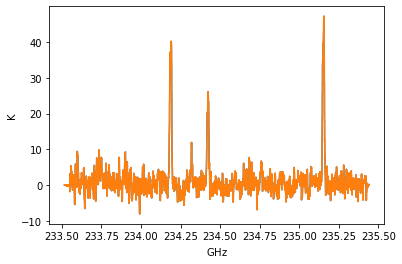

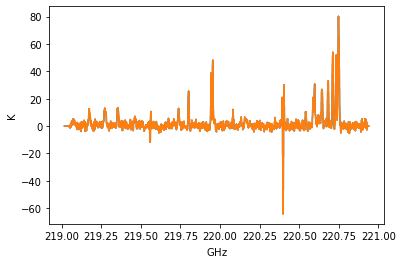

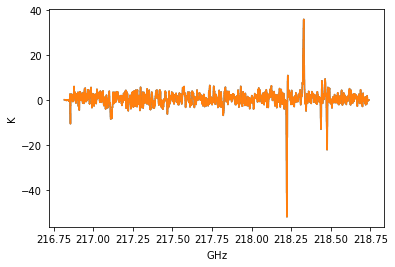

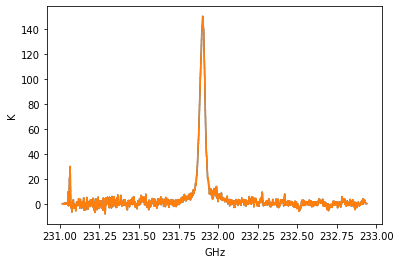

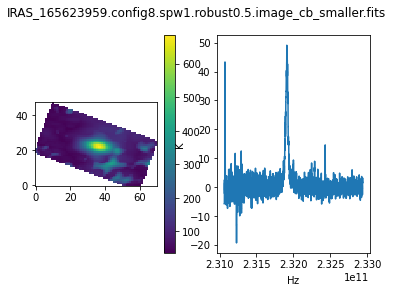

In [116]:
import glob
import spectral_cube.analysis_utilities
import reproject
from tqdm.notebook import tqdm

cbflist = (glob.glob('IRAS_165623959.config8.spw[0-3].robust0.5.image_cb_smaller.fits'))
for fn in cbflist:
    basename = os.path.split(fn)[-1].split(".fits")[0]
    try:
        cube = SpectralCube.read(fn, use_dask=True)
    except Exception as ex:
        print(ex)
        continue
    print(cube)
    scube = cube.subcube_from_regions(regvsm)
    mx = scube.max(axis=0)
    #msk = mx > 0.003*mx.unit
    print("Mean spectrum")
    sp = scube.mean(axis=(1,2))
    
    sp.write(f'spectra/{fn.split("/")[-1].replace(".fits","_meanspec.fits")}', overwrite=True)


    # reproject the velocity map into the cube's coordinate system
    vmap_proj,_ = reproject.reproject_interp(vmap,
                                             scube.wcs.celestial,
                                             shape_out=scube.shape[1:])
    vmap_proj = u.Quantity(vmap_proj, u.km/u.s)

    # convert to km/s with arbitrary rest value so 0 km/s can be interpreted
    if scube.spectral_axis.unit.is_equivalent(u.Hz):
        scube = scube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=scube.spectral_axis.mean())

    print("Stacking")
    # perform the stacking!
    stack = spectral_cube.analysis_utilities.stack_spectra(scube, vmap_proj,
                                                           v0=0.0*u.km/u.s,
                                                           #progressbar=tqdm,
                                                           #num_cores=8
                                                          )
    fstack = stack.with_spectral_unit(u.GHz)

    pl.suptitle(f"{fn}")
    fstack.write(f'spectra/{basename}_stack.fits', overwrite=True)

    pl.clf()
    fstack.quicklook(filename=f'spectra/figures/{basename}_stack.pdf')
    fstack.quicklook(filename=f'spectra/figures/{basename}_stack.png')
    
    
    fig = pl.figure()
    mappable = pl.subplot(1,2,1).imshow(mx.value, origin='lower', interpolation='none')
    pl.colorbar(mappable)
    pl.subplot(1,2,2)
    pl.suptitle(fn)
    sp.quicklook()

In [117]:
ls spectra

figures/
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_meanspec.fits
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_stack.fits
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_meanspec.fits
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_stack.fits
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller_meanspec.fits
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller_stack.fits
IRAS_165623959.config8.spw3.robust0.5.image_cb_smaller_meanspec.fits
IRAS_165623959.config8.spw3.robust0.5.image_cb_smaller_stack.fits


In [118]:
stackspectra = []
for ii,fn in enumerate(glob.glob('spectra/*_stack.fits')):
    pysp = pyspeckit.Spectrum(fn)
    basename = os.path.basename(fn)
    spl = basename.split(".")
    pysp.specname = f'{spl[0]}_{spl[2]}_stack'
    stackspectra.append(pysp)

IRAS_165623959_spw0_stack
IRAS_165623959_spw1_stack
IRAS_165623959_spw2_stack
IRAS_165623959_spw3_stack


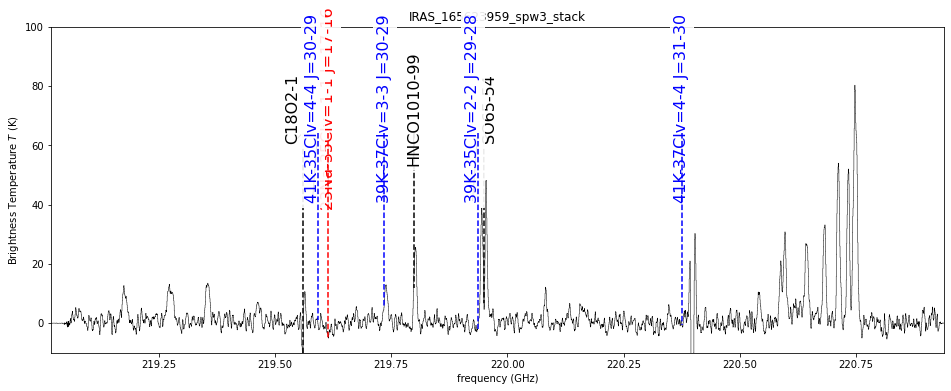

In [126]:
overplot_saltlines(stackspectra, vcen=0*u.km/u.s, savepath='spectra/figures', ymin=-10, ymax=100)

In [127]:
ls spectra/figures/

color_labels_IRAS_165623959_spw0_stack.png
color_labels_IRAS_165623959_spw1_stack.png
color_labels_IRAS_165623959_spw2_stack.png
color_labels_IRAS_165623959_spw3_stack.png
color_labels_spw1.png
color_labels_spw2.png
color_labels_spw3.png
color_labels_spw4.png
gallery.html
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_stack.png
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_stack.png
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller_stack.png
IRAS_165623959.config8.spw3.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw3.robust0.5.image_cb_smaller_stack.png
IRAS_165623959_spw0_stack.png
IRAS_165623959_spw1_stack.png
IRAS_165623959_spw2_stack.png
IRAS_165623959_spw3_stack.png
spw1.png
spw2.png
spw3.png
spw4.png
style.css


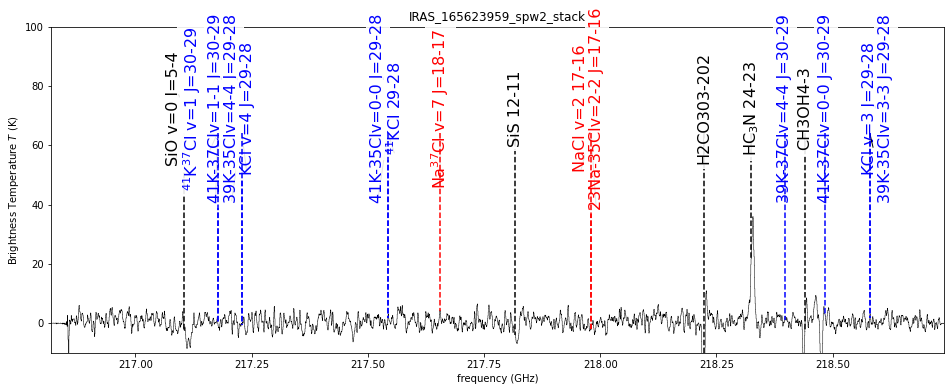

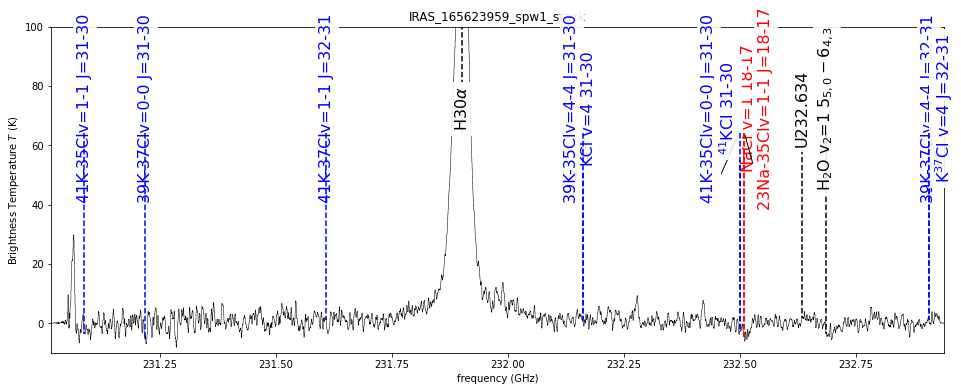

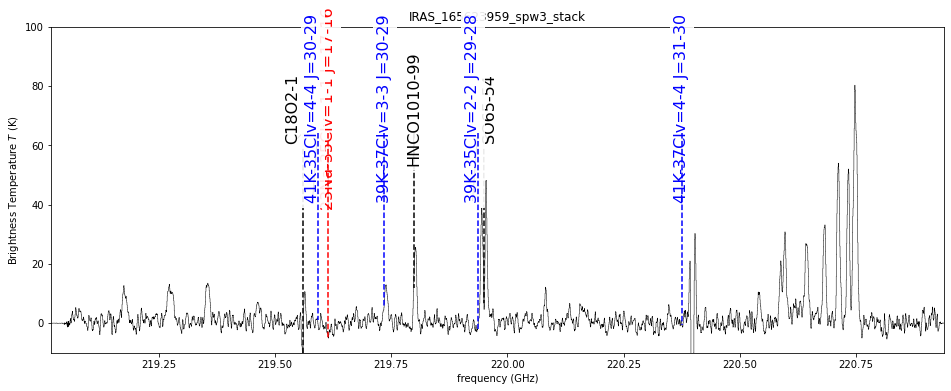

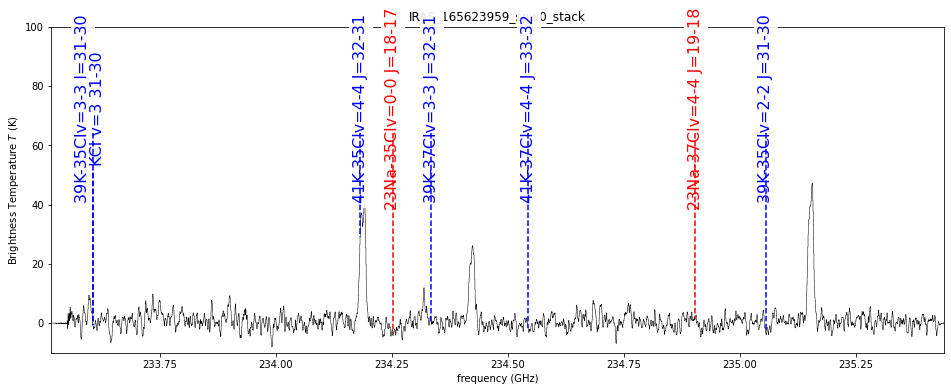

In [128]:
for fn in glob.glob('spectra/figures/color*stack.png'):
    display(Image(fn))